In [4]:
import json
import os
import random
from nltk.stem.snowball import FrenchStemmer
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
import re
from collections import defaultdict
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [5]:
from ggplot import *

In [6]:
data_topics = pd.read_csv("/media/igna/Data/CRI_IA/Teacher_to_teacher/forum.csv")

In [7]:
path = '/media/igna/Data/CRI_IA/Teacher_to_teacher/'
fls = list(filter(lambda x:'data_' in x, os.listdir(path)))

comments_list = []

for one_file in fls:

    with open(path + one_file) as json_data:
        d = json.load(json_data)

    for topic in d:
        for article in topic["data_topic"]:
            art = dict((k, article[k]) for k in ("author","date_message","nb_messages"))
            art["forum_name"] = topic["forum_name"]
            art["topic_name"] = topic["topic_name"]
            comments_list.append(art)
        
df = pd.DataFrame(comments_list)

In [8]:
len(df)

676757

In [9]:
df['date_message'] = pd.to_datetime(df['date_message'])
df['year'] = df.date_message.apply(lambda x: x.year)

In [10]:
df['month'] = df.date_message.apply(lambda x: x.month)

In [11]:
df['year'].value_counts().sort_index()

2003    20417
2004    36217
2005    42355
2006    39681
2007    45715
2008    51730
2009    57178
2010    58768
2011    56240
2012    60141
2013    48444
2014    44677
2015    44306
2016    36814
2017    18028
2018    15694
2019      352
Name: year, dtype: int64

In [12]:
df["forum_name"].value_counts()

Organiser, préparer et gérer une classe en élémentaire    207880
Français                                                  149034
L'élémentaire au jour le jour                              98558
Thèmes et projets pour l'élémentaire                       55164
Mathématiques                                              49361
Histoire et géographie                                     25801
Sciences et technologies                                   19258
Arts visuels                                               18934
Langues                                                    18296
Musique                                                    17426
E.P.S.                                                      6960
Enseignement moral et civique                               5835
TICE à l'école élémentaire                                  4250
Name: forum_name, dtype: int64

In [13]:
df['author'].nunique()

21559

In [14]:
df["date_message"].max() - df["date_message"].min()

Timedelta('5826 days 20:21:27')

(array([20417., 36217., 42355., 39681., 45715., 51730., 57178., 58768.,
        56240., 60141., 48444., 44677., 44306., 36814., 18028., 16046.]),
 array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
        2014, 2015, 2016, 2017, 2018, 2019]),
 <a list of 16 Patch objects>)

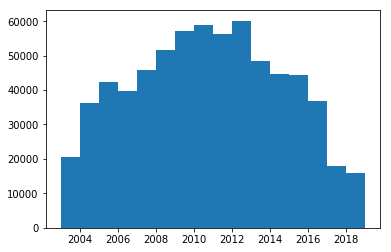

In [15]:
plt.hist(df.year,bins=range(2003,2020))

In [16]:
plt.rcParams["figure.figsize"] = [20,10]

In [17]:
data = df.groupby([df["year"], df["month"]]).year.count()

In [18]:
data[2003].values.argmax()

7

In [19]:
df.groupby([df["year"], df["month"]]).year.count()[2010][9]

6781

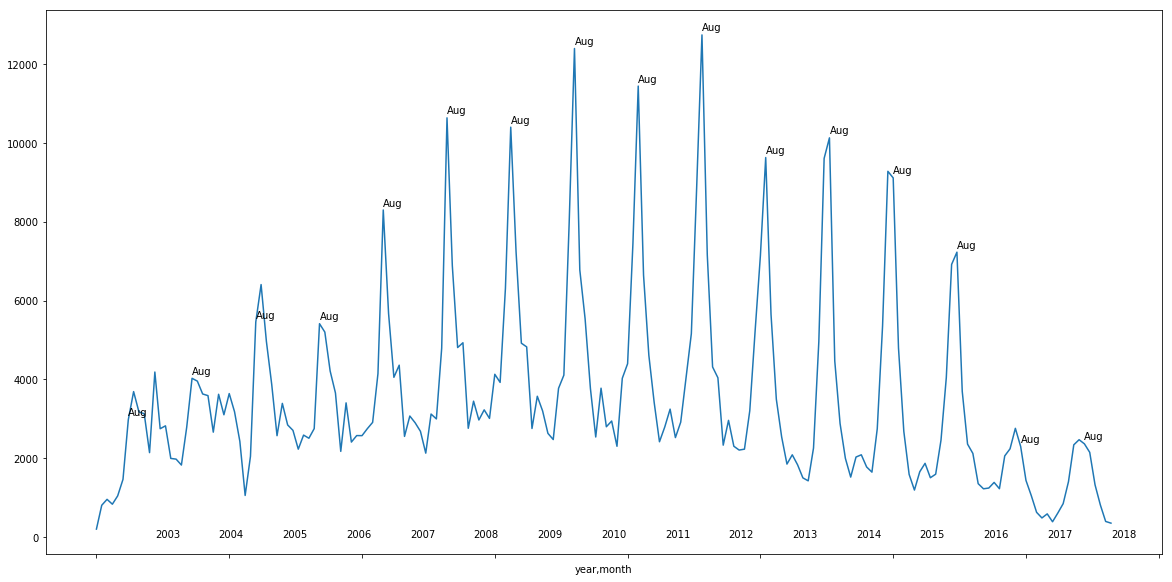

In [20]:
i = 7
for y in range(2003,2019):
    plt.text(i-1,df.groupby([df["year"], df["month"]]).year.count()[y][8]+100,"Aug")
    i = i+12
    plt.text(i-8,0,str(y))

df.groupby([df["year"], df["month"]]).year.count().plot()

In [21]:
df.columns

Index(['author', 'date_message', 'forum_name', 'nb_messages', 'topic_name',
       'year', 'month'],
      dtype='object')

In [22]:
df['weekday'] = df.date_message.apply(lambda x: x.weekday())

In [23]:
df['day'] = df.date_message.apply(lambda x: x.day)

In [24]:
df.to_csv("/media/igna/Data/CRI_IA/Teacher_to_teacher/time_data.csv")

In [25]:
dweek = df.loc[df.year == 2009].groupby([df["month"], df["weekday"]]).count()

In [26]:
dweek = dweek.add_suffix('_Count').reset_index()

In [27]:
dweek = dweek.loc[:, ['month','weekday','weekday_Count']]

In [28]:
dweek

,month,weekday,weekday_Count
0,1,0,298
1,1,1,333
2,1,2,719
3,1,3,394
4,1,4,356
5,1,5,631
6,1,6,717
7,2,0,362
8,2,1,358
9,2,2,617


In [29]:
def max_min(x):
    return x.max() - x.min()

max_min.__name__ = 'time_range'

auth_daf = df.groupby('author').agg({'forum_name':['count','nunique'], 
                                     'topic_name':'nunique', 
                                     'date_message':['min',max_min,'max']})

In [30]:
auth_daf['days'] = auth_daf.date_message.time_range.apply(lambda x: x.days)

In [31]:
time_range_users = pd.DataFrame(auth_daf.days.groupby(pd.cut(auth_daf['days'], np.arange(0,math.ceil(auth_daf.days.max()/365)*365,365))).count())

In [32]:
time_range_users["years"] = range(0,len(time_range_users))

In [33]:
time_range_users = time_range_users.sort_values("years",ascending=False)

In [34]:
time_range_users["cumsum_days"] = time_range_users.days.cumsum()

(14, 0)

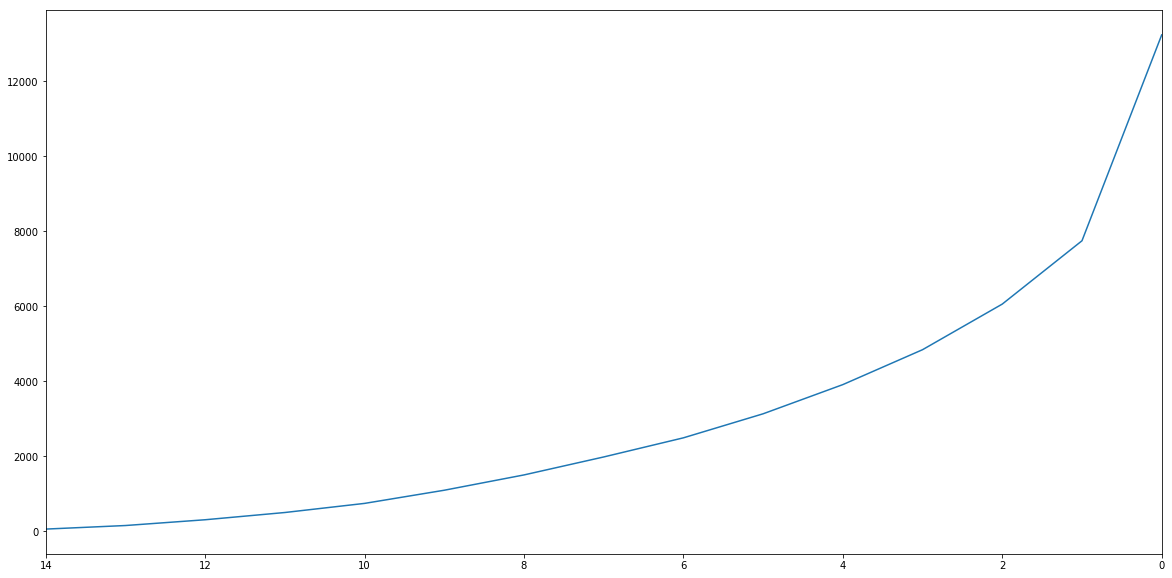

In [35]:
plt.plot(time_range_users["years"],time_range_users["cumsum_days"])
plt.xlim(14, 0)

In [36]:
len(auth_daf[auth_daf.days > 365*4])

3952

In [37]:
auth_daf.sort_values(by=[("forum_name","count")], ascending=False)[1:20]

forum_name         topic_name        date_message  \
                        count nunique    nunique                 min   
author                                                                 
mamiebrossard            6069      13       2883 2003-02-12 10:08:51   
Charivari                5397      13       2097 2006-03-21 11:08:34   
sandrine062              3762      13       1303 2005-10-18 11:28:52   
Petit_Gizmo              3473      13       1448 2003-02-25 09:19:17   
titebouillotte           2858      10        216 2008-10-18 10:41:13   
Princesse Dézécole       2788      13       1531 2003-09-20 14:25:07   
dhaiphi                  2541      12       1260 2004-02-21 21:11:58   
Lapin bondissant         2533      11       1300 2003-02-15 19:36:28   
Théoboulo                2515      13        551 2007-07-26 15:14:31   
sanleane                 2493      12        379 2010-03-06 21:26:11   
cpette                   2473      13        375 2008-03-15 20:26:24   
Bla67                    2449      12        297 2011-08-28 11:32:22   
André Jorge              2424      13       2044 2003-02-09 06:54:37   
Japet                    2382      12        485 2008-11-22 22:44:36   
ouioui                   2352      12       1430 2004-02-26 21:52:05   
boubiz                   2331      11        416 2009-09-19 07:55:58   
Nath                     2283      13       1589 2003-02-04 15:03:00   
helenel                  2220      13       1047 2008-07-08 13:34:18   
hamster                  2125      13        946 2003-03-16 16:12:54   

                                                           days  
                           time_range                 max        
author                                                           
mamiebrossard      5806 days 21:37:01 2019-01-06 07:45:52  5806  
Charivari          4171 days 08:58:14 2017-08-21 20:06:48  4171  
sandrine062        4795 days 20:57:48 2018-12-05 08:26:40  4795  
Petit_Gizmo        5657 days 05:30:22 2018-08-22 14:49:39  5657  
titebouillotte     3177 days 04:00:24 2017-06-30 14:41:37  3177  
Princesse Dézécole 5543 days 03:42:52 2018-11-23 18:07:59  5543  
dhaiphi            3016 days 18:57:24 2012-05-26 16:09:22  3016  
Lapin bondissant   3001 days 00:20:29 2011-05-05 19:56:57  3001  
Théoboulo          3573 days 18:20:09 2017-05-08 09:34:40  3573  
sanleane           3153 days 08:36:40 2018-10-24 06:02:51  3153  
cpette             3675 days 13:07:06 2018-04-08 09:33:30  3675  
Bla67              2151 days 10:42:16 2017-07-18 22:14:38  2151  
André Jorge        5770 days 10:34:00 2018-11-27 17:28:37  5770  
Japet              3056 days 17:37:11 2017-04-06 16:21:47  3056  
ouioui             4197 days 08:37:49 2015-08-25 06:29:54  4197  
boubiz             3318 days 21:39:23 2018-10-21 05:35:21  3318  
Nath               5268 days 20:11:31 2017-07-09 11:14:31  5268  
helenel            3840 days 21:41:49 2019-01-13 11:16:07  3840  
hamster            5779 days 05:45:26 2019-01-10 21:58:20  5779

AttributeError: 'tuple' object has no attribute 'show'

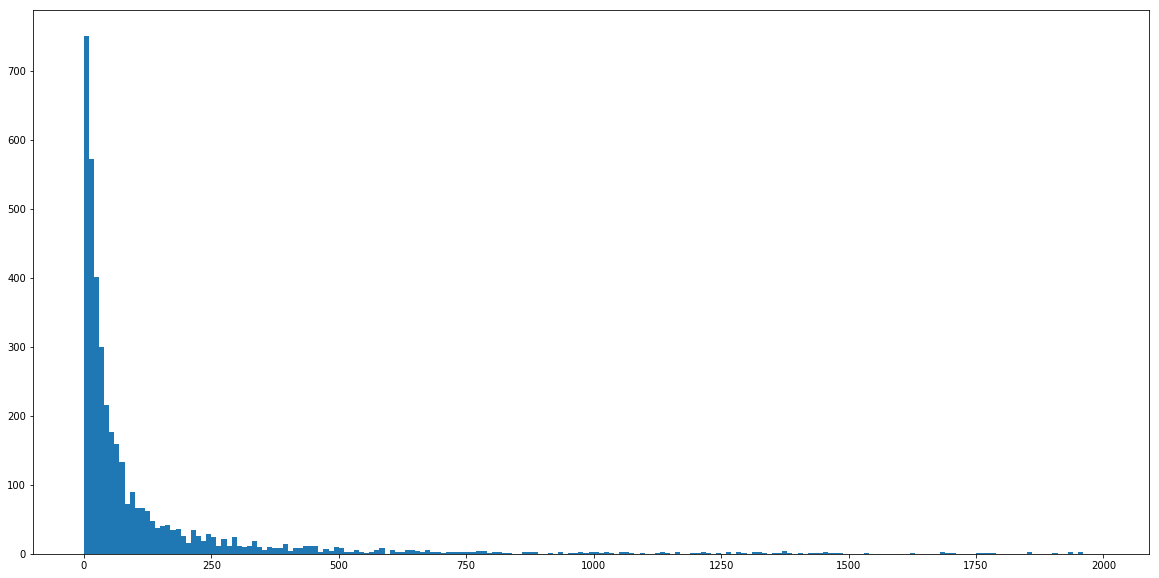

In [38]:
plt.hist(auth_daf[auth_daf.days > 365*4].forum_name["count"],bins=range(0,2000,10)).show()

In [ ]:
data_topics[1:10]

In [ ]:
df[10:10]

Week day for posting
Frequencies

## Title

this is the program

- 1
- 2